In [44]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#1. Загрузка изображения 
img = cv.imread('../lab2/open-cv-logo.jpg') 
if img is None:
    raise FileNotFoundError("Изображение не найдено.")

print("Размер изображения:", img.shape)

Размер изображения: (512, 512, 3)


Пиксель (100,100): [0 0 0]
Синий канал: 254
После изменения: [  0 255   0]


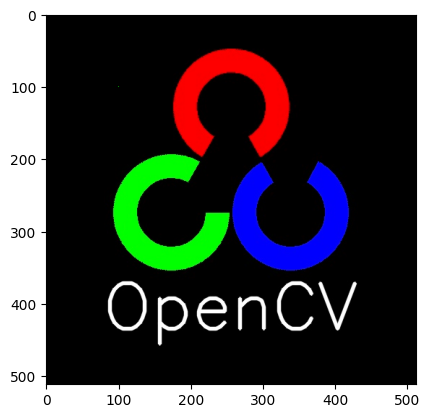

In [45]:
#2. Доступ к пикселям и изменение 
px = img[100, 100]
print("Пиксель (100,100):", px)
print("Синий канал:", img[100, 200, 0])

# Меняем пиксель
img[100, 100] = [0, 255, 0]
print("После изменения:", img[100, 100])

plt.imshow(img)

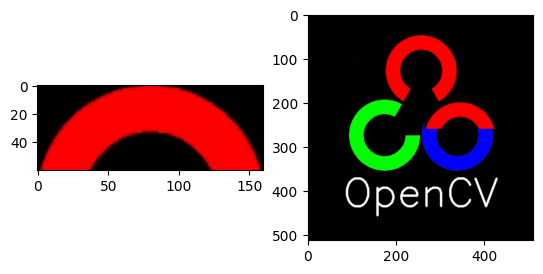

In [46]:
#3. Работа с ROI 
roi = img[48:108,176:336]  # выделяем область

#Копируем ROI в другое место
img[200:260,264:424] = roi

fig, ax = plt.subplots(1,2)
ax[0].imshow(roi)
ax[1].imshow(img)

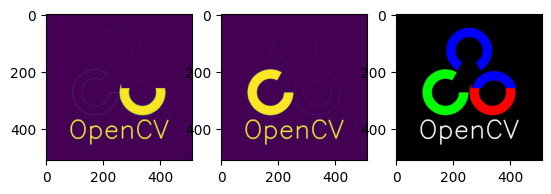

In [47]:
#4. Разделение и объединение каналов
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
b, g, r = cv.split(img)

fig, ax = plt.subplots(1,3)
ax[0].imshow(b)
ax[1].imshow(g)
ax[2].imshow(r)

merged = cv.merge([b, g, r])
plt.imshow(img)

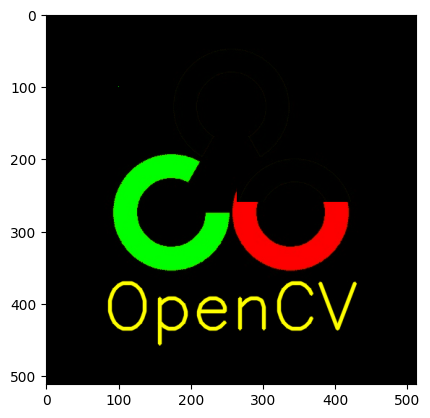

In [48]:
#5. Работа с отдельными каналами
img[:, :, 2] = 0  # обнуляем красный канал
plt.imshow(img)

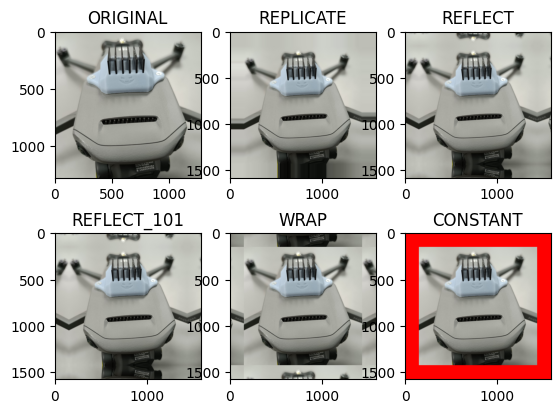

In [58]:
#6 Работа с границами

BLUE = [255,0,0]
 
img1 = cv.imread('./mavic.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
assert img1 is not None, "file could not be read, check with os.path.exists()"
 
replicate = cv.copyMakeBorder(img1,150,150,150,150,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,150,150,150,150,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,150,150,150,150,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,150,150,150,150,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,150,150,150,150,cv.BORDER_CONSTANT,value=BLUE)
 
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
 
plt.show()